In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('datasets\Spotify_Top100_Songs.csv')

In [4]:
data.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


In [5]:
data['key'] = np.where(data['key'] == 0, 'C',
                np.where(data['key'] == 1, 'C#/Db',
                np.where(data['key'] == 2, 'D',
                np.where(data['key'] == 3, 'D#/Eb',
                np.where(data['key'] == 4, 'E',
                np.where(data['key'] == 5, 'F',
                np.where(data['key'] == 6, 'F#/Gb',
                np.where(data['key'] == 7, 'G',
                np.where(data['key'] == 8, 'G#/Ab',
                np.where(data['key'] == 9, 'A',
                np.where(data['key'] == 10, 'A#/Bb',
                np.where(data['key'] == 11, 'B', 'No Key'))))))))))))

data['mode'] = np.where(data['mode'] == 0, 'Minor', 'Major')

In [6]:
data['id'] = data['id'].astype('string')
data['name'] = data['name'].astype('string')
data['key'] = data['key'].astype('string')
data['mode'] = data['mode'].astype('string')

In [9]:
data['id'].duplicated() # Hay canciones con ID duplicados

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96    False
97     True
98    False
99     True
Name: id, Length: 100, dtype: bool

In [10]:
data = data.drop_duplicates(subset=['id'], keep='first') # elimino las canciones con ID duplicados

In [16]:
data.isna().sum() # Chequeamos si hay valores nulos

id                  0
name                0
duration            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
danceability        0
dtype: int64

Analizamos los tipos de datos y si hay valores nulos

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 98
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                86 non-null     string 
 1   name              86 non-null     string 
 2   duration          86 non-null     float64
 3   energy            86 non-null     float64
 4   key               86 non-null     string 
 5   loudness          86 non-null     float64
 6   mode              86 non-null     string 
 7   speechiness       86 non-null     float64
 8   acousticness      86 non-null     float64
 9   instrumentalness  86 non-null     float64
 10  liveness          86 non-null     float64
 11  valence           86 non-null     float64
 12  tempo             86 non-null     float64
 13  danceability      86 non-null     float64
dtypes: float64(10), string(4)
memory usage: 10.1 KB


Análisis univariado: De está forma podemos observar las variables generales del dataset y sus medidas estadísticas.

In [18]:
data.describe()

,duration,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,3.427674,0.582349,-6.636802,0.075931,0.332476,0.079070,0.160213,0.499656,121.718535,0.641279
std,0.968516,0.169188,2.437192,0.070728,0.289275,0.237755,0.109314,0.236104,28.883341,0.129328
min,0.730000,0.157000,-14.067000,0.025300,0.000280,0.000000,0.034100,0.059200,71.884000,0.352000
25%,2.955000,0.465250,-7.433000,0.035575,0.094175,0.000000,0.089175,0.310250,98.282250,0.564500
50%,3.370000,0.603000,-6.348500,0.050450,0.275000,0.000000,0.122000,0.503000,118.997500,0.660500
75%,3.630000,0.704000,-4.904500,0.081550,0.577750,0.000081,0.203750,0.682000,140.760000,0.734000
max,10.220000,0.883000,-2.724000,0.368000,0.941000,0.941000,0.509000,0.967000,180.917000,0.910000


Histograma y densidad de las variables con características: De esta forma vamos a poder observar dónde se concentran los datos

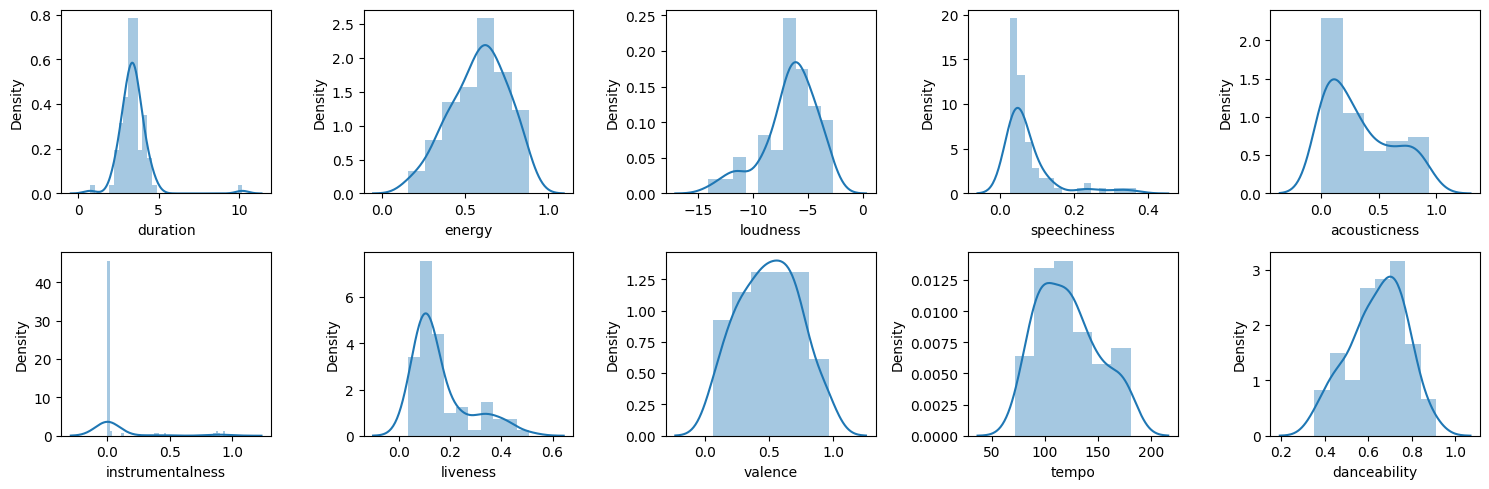

In [19]:
# Selecciono las columnas con métricas para graficar
columns = ['duration', 'energy', 'loudness', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
axs = axs.ravel()

for i in range(len(columns)):
    sns.distplot(data[columns[i]], ax=axs[i])

plt.tight_layout()

Realizamos lo mismo pero para boxplots, cuyo objetivo es observar outliers

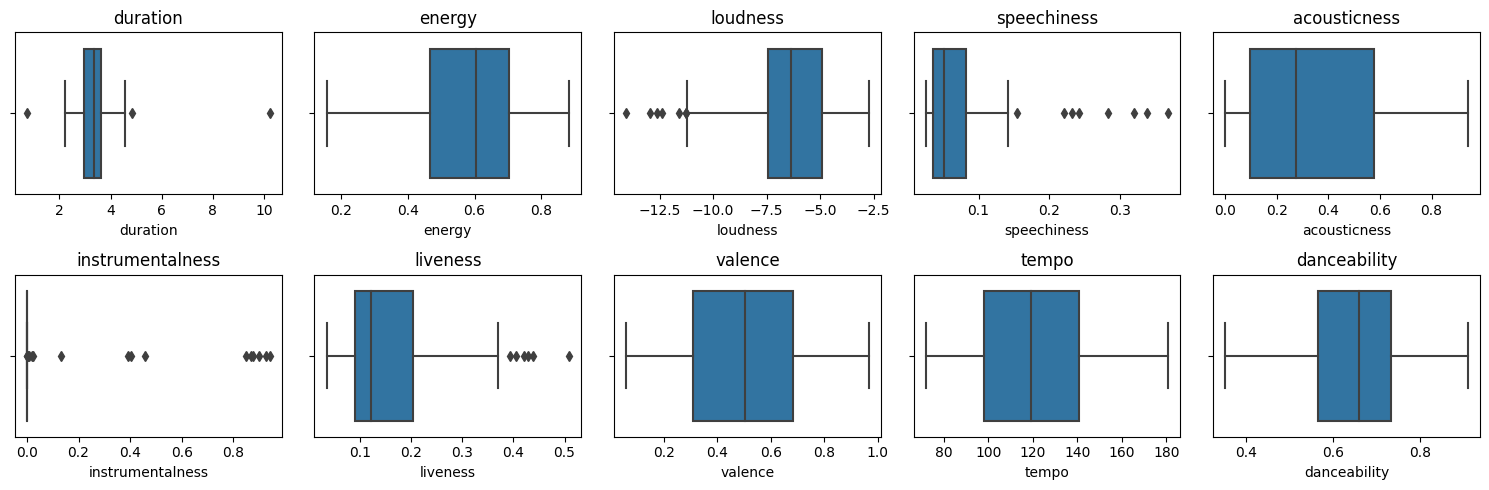

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
axs = axs.ravel()

for col, ax in zip(columns, axs.flatten()):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(col)

fig.tight_layout()
plt.show()

In [21]:
data['mode'].value_counts(normalize=True)

Major    0.581395
Minor    0.418605
Name: mode, dtype: Float64

In [22]:
data['key'].value_counts(normalize=True)

C        0.174419
C#/Db    0.127907
B        0.127907
F#/Gb    0.093023
F        0.093023
E        0.093023
G#/Ab    0.081395
A        0.046512
A#/Bb    0.046512
G        0.046512
D        0.034884
D#/Eb    0.034884
Name: key, dtype: Float64

Análisis Bivariado: Podemos observar las correlaciones entre variables, en este caso abierto por 'Mode' para observar las características principales de cada una.

<AxesSubplot:>

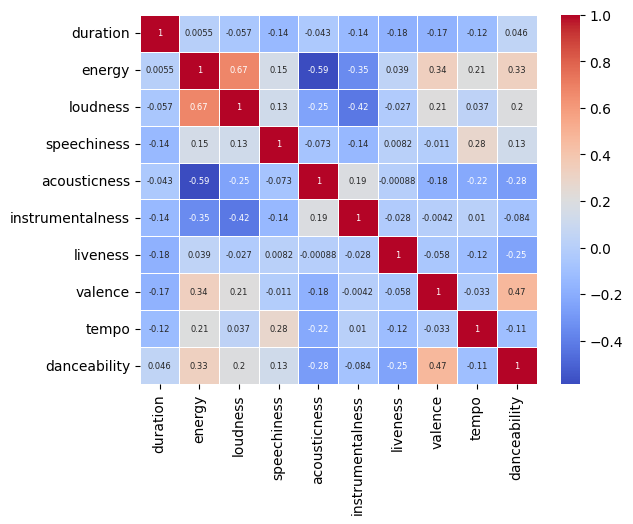

In [23]:
sns.heatmap(data.corr(), annot = True, annot_kws={"size":6}, cmap='coolwarm', linewidths=.5)

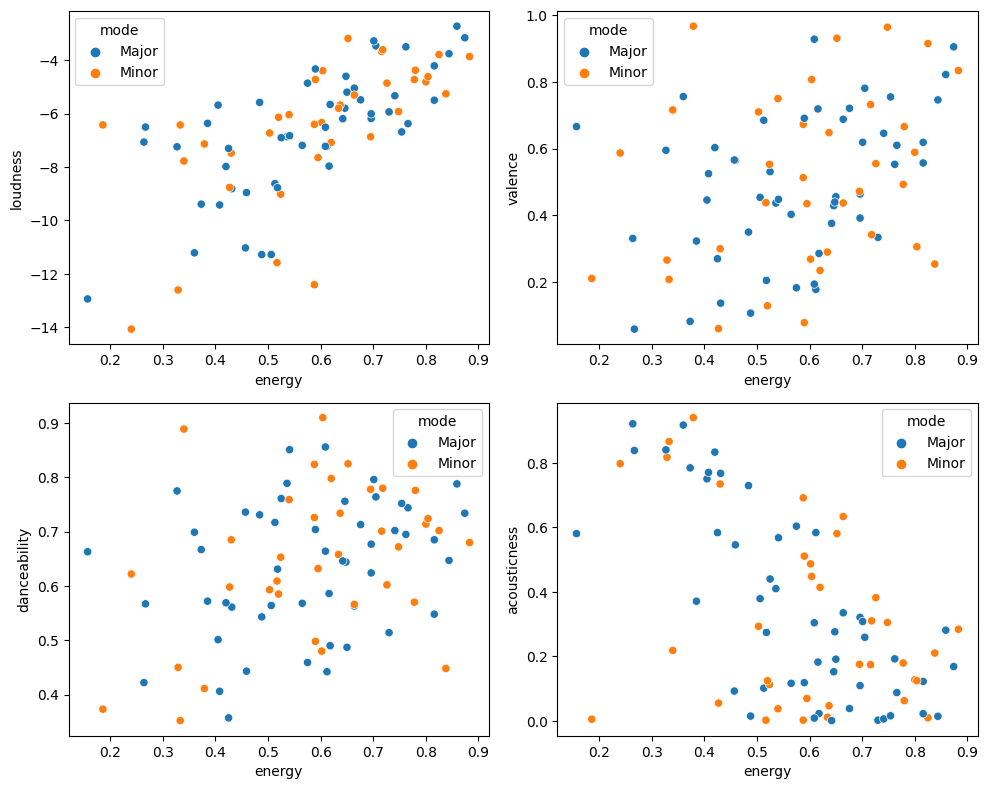

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))
sns.scatterplot(data=data, x='energy', y='loudness', hue='mode', ax=ax[0][0])
sns.scatterplot(data=data, x='energy', y='valence', hue='mode', ax=ax[0][1])
sns.scatterplot(data=data, x='energy', y='danceability', hue='mode', ax=ax[1][0])
sns.scatterplot(data=data, x='energy', y='acousticness', hue='mode', ax=ax[1][1])

plt.tight_layout()

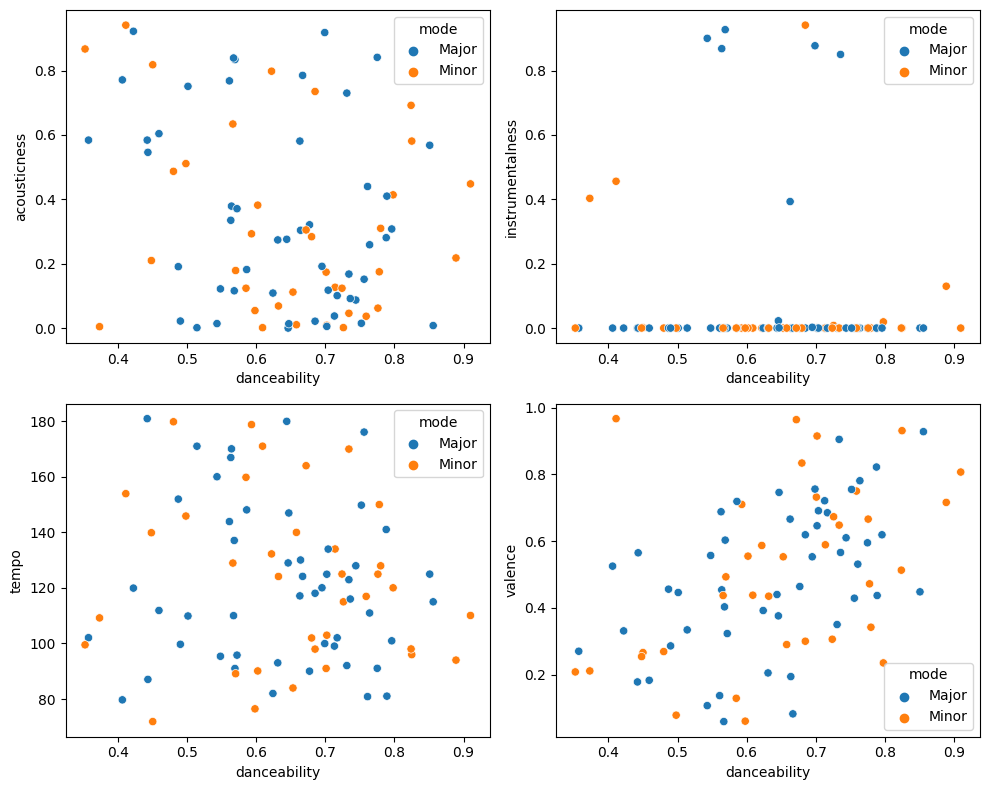

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))
sns.scatterplot(data=data, x='danceability', y='acousticness', hue='mode', ax=ax[0][0])
sns.scatterplot(data=data, x='danceability', y='instrumentalness', hue='mode', ax=ax[0][1])
sns.scatterplot(data=data, x='danceability', y='tempo', hue='mode', ax=ax[1][0])
sns.scatterplot(data=data, x='danceability', y='valence', hue='mode', ax=ax[1][1])

plt.tight_layout()

Con estos gráficos y tablas podemos identificar las características principales de los temas del Top 100 de Spotify, así como identificar ciertas correlaciones entre estas características.